# Sprint 1-  Spotify EDA

Hemos encontrado un dataset con informacion de 19.000 canciones y 15 features que fueron seleccionadas desde la web API de Spotify y organizadas en un archivo csv. Usamos el dataset de: https://www.kaggle.com/edalrami/19000-spotify-songs (el archivo CSV de 'song_data.csv')

Todas las canciones del dataset son de distintos generos musicales, seleccionadas aleatoriamente, y por ende los generos son muy diversos. Parece ser una muestra representativa de la poblacion total de canciones ya que tantos generos distintos pueden aportarle la diversidad a la muestra que la misma poblacion tiene, y no presentar un sesgo o inconsistencia con respecto a ella.
Hoy en dia, la industria de la musica se ha vuelto mas competitiva que nunca, con la introduccion de las tecnologias de la informacion se generaron caida de los costos de transaccion, auge de las plataformas de streaming, caidas de las barreras de entrada al mercado y diversificacion del "market-share"(producto de la aparicion de sellos independientes que le compiten a los grandes sellos oligopolicos tradicionales).
Las herramientas de produccion ya no estan monopolizadas por las discograficas "majors", estan disponibles a bajo costo y al alcance de cualquier "home-studio". Es por ello que la informacion se recorre rapidamente por toda la industria y millones de productores "indie" estan expectantes para encontrar el proximo "nuevo sonido" que marcara tendencia para hacer "hits".
Nuestra motivacion es hacer un analisis exploratorio de la base de datos que hemos encontrado e investigar si es posible tratar de predecir si una cancion sera popular o no.                                                                                      De esta forma, generando un algoritmo que pueda ser de utilidad para los agentes del mercado y que puedan utilizar a la hora de producir nueva musica y crear nuevos sonidos que tengan potencial de marcar tendencia. 

Que variables me van a servir para explicar la variable objetivo?

Como un entusiasta y conocedor de la industria de la musica, me parece que a simple vista, el loudness, danceability y energy van a tener una mayor presencia en las canciones populares de hoy en dia, al igual que valores de alrededor de 3 minutos de el atributo "song_duration_ms". También, posiblemente los hits de hoy en día tengan muchos vocales y muy pocas secciones sólo instrumentales (ya que lo que hace el hit son las vocales pegadizas en los estribillos). Posiblemente el atributo "instrumentalness" tenga una relación negativa con la musica Popular, por el contrario el atributo "speechiness" tenga una relación positiva (por lo que acabamos de explicar).

In [1]:
#importamos las herramientas para el Analisis Exploratorio

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#cargamos los datos
spotify_song_data = pd.read_csv('song_data.csv')

In [3]:
#Creando Checkpoints y duplicando la data para poder hacer modificaciones sin problemas.

song_data=spotify_song_data.copy()

In [4]:
song_data.shape

(18835, 15)

In [5]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [6]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


## Descripcion-Analisis de Features

In [7]:
np.unique(song_data.song_popularity)
#SONG_POPULARITY
#Es un indice de popularidad de canciones construido en la API de Spotify que 
#nos indica su popularidad en numeros enteros en un rango de 0-100. 100= maxima popularidad, 0=minima popularidad


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [8]:
np.unique(song_data.key)
#KEY
#"Key" nos muestra la escala musical en numeros enteros desde 0 a 11 en la que se encuentra la cancion. Si "Key" es -1 significa que no hay escala musical registrada de la cancion
#La escala es la siguente: 0= Do, 1=Do# , 2=Re , 3=Re#, 4=Mi, 5=Fa, 6=Fa#, 7=Sol, 8=Sol#, 9=La, 10=La#, 11= Si

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [9]:
np.unique(song_data.acousticness)
#ACOUSTICNESS
#max(song_data.acousticness)
#min(song_data.acousticness)
"{:.8f}".format(float(min(song_data.acousticness)))

#Acousticness es una medida en numeros decimales que va desde 0 a 1, mientras mas cercano a 1,
#mayor es el nivel de elementos acusticos que posee determinada cancion. 

'0.00000102'

In [10]:
#SONG_DURATION_MS

def convert_from_ms( milliseconds ): 
     seconds, milliseconds = divmod(milliseconds,1000) 
     minutes, seconds = divmod(seconds, 60) 
     seconds = seconds + milliseconds/1000 
     return minutes, seconds 

print(convert_from_ms(min(song_data.song_duration_ms)))

np.unique(song_data.song_duration_ms)

#Convertimos la duracion de las canciones de milisegundos a segundos con la funcion "convert_from_ms" para que sea mas legible la interpretacion de los datos.
#la duracion de las canciones tiene una gran varianza y va desde 00:12 segundos a 29:59 minutos. Lo analizaremos mas adelante con mayor detalle.
Std_song_duration_ms = "{:.8f}".format(float(5.988754e+04))
Std_song_duration_ms

(0, 12.0)


'59887.54000000'

In [11]:
#ENERGY
np.unique(song_data.energy)
# Energy es una columna que contiene valores decimales que van de 0 a 1, cuanto mas cercano al 1, mayor es la proporcion de energia que transmite la cancion.

array([0.00107, 0.00163, 0.00205, ..., 0.996  , 0.997  , 0.999  ])

In [12]:
#danceability
#np.unique(song_data.danceability) 
#Valores decimales de 0 a 1, cuanto mas cercano al 1, mayor es la proporcion de "dance" que contiene la cancion. 


#instrumentalness
# np.unique(song_data.instrumentalness)
#Valores decimales de 0 a 1, cuanto mas cercano al 1, mayor es la proporcion instrumental que contiene la cancion, y menor la proporcion vocal. 
# np.unique(song_data.instrumentalness).max()
# np.unique(song_data.instrumentalness).min()


#liveness
#np.unique(song_data.liveness)
#Valores decimales de 0 a 1, cuanto mas cercano al 1, mayor es la probabilidad de que la cancion haya sido grabada en vivo en vez de en estudio.
# valores cercanos a cero indican que la cancion fue grabada en un estudio.

#loudness
#np.unique(song_data.loudness)
#np.unique(song_data.loudness).min()
# Valores decimales entre -38.76 y 1.585 medidos en Decibeles (DB). Cuanto mas decibeles haya, mayor sera el nivel de volumen.


#speechiness
#np.unique(song_data.speechiness)
#Valores decimales de 0 a 1, cuanto mas cercano al 1, mayor cantidad de deteccion de palabras habladas en la cancion. Valores muy altos suelen ser canciones
# que se basan casi exclusivamente en vocales, y valores muy bajos probablemente sean solo musica instrumental.


#tempo
#np.unique(song_data.tempo)
# Numeros decimales que van desde 0  a 242 y representan el tempo de la cancion. Valores muy altos seran canciones muy rapidas y valores bajos canciones mas lentas.


#time_signature
#np.unique(song_data.time_signature)
#Numeros enteros que van desde 0 a 5 y son una medida que representa la cantidad de beats que hay dentro de cada compas de una cancion. 
#Ayudan a detectar los ritmos y tiempos de las canciones.


#audio_valence
#np.unique(song_data.audio_valence)
#Valores decimales de 0 a 1 que miden que tan positivo o que tan negativo es el "mood" o "theme" de una cancion. 
# Cuando el valor se acerca a 1, seran canciones mas alegres o positivas, cuando el valor sea cercano a cero, seran canciones mas tristes, oscuras o negativas.



#audio_mode
#np.unique(song_data.audio_mode)
#audio_mode puede tomar valor 0 o 1.Representa los modos de la escala musical de una cancion, y estos pueden ser 
#cero si el modo de la escala musical es Menor, o 1 si el modo es en escala Mayor.

# Limpieza de Datos

In [13]:
#primero chequeamos si hay valores nulos o NaN en las instancias del Dataset

song_data.columns[song_data.isnull().any()]


Index([], dtype='object')

In [14]:
song_data.isnull().sum()
#no tenemos ningun valor ("NaN") en ninguna de las columnas.

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

Nuestra varaible a predecir la vamos a armar a partir del feature "song_popularity".
Para que sea un modelo de clasificacion, vamos a crear una nueva columna en el dataset que contenga "1" si "song_popularity" >= 69.5 y "0" si "song_popularity" < 69.5.

El valor "69.5" no es al azar, se encontro investigando los ratings de 10 años de las canciones mas populares en la API de Spotify y sacando un promedio de ellos.
De acuerdo a este valor, las canciones que tienen mas que 69.5 de "song_popularity" pueden permanecer mucho tiempo en las principales playlists y los charts de Spotify.

In [15]:
song_data["popularity"] = [1 if i>= 69.5 else 0 for i in song_data.song_popularity]

### Typecasting

Validamos que la estructura de los datos corresponda con la esperada

In [16]:
song_data.columns.unique()

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'popularity'],
      dtype='object')

In [17]:
song_data.song_name = song_data.song_name.astype(str) #quiza tengan algun numero en el titulo, por eso lo validamos al "Str" type
song_data.song_popularity = song_data.song_popularity.astype(float)

In [18]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float) #estaba en notacion cientifica, y nos aseguramos pasandolo a float

In [19]:
song_data.time_signature= song_data.time_signature.astype(float) #chequeamos por las dudas

In [20]:
song_data.audio_mode= song_data.audio_mode.astype(float)

# Analisis de Features y Visualizaciones 

In [21]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,0
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1.0,0.1070,122.444,4.0,0.198,1
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1.0,0.0313,172.011,4.0,0.574,0


In [22]:
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.660385
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.005092
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.101694
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.117811
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.042833
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.152954
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.021929
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.025308
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.145254
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.019096


<AxesSubplot:>

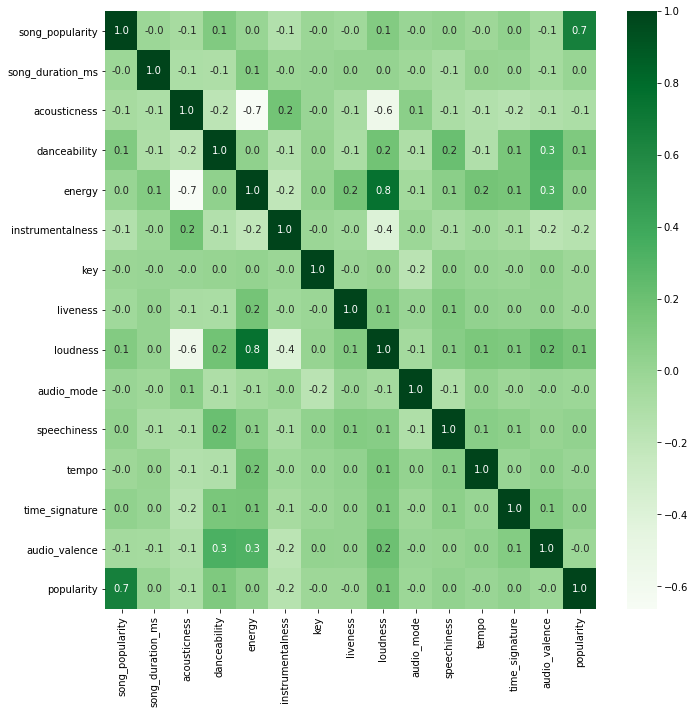

In [23]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(song_data.corr(), fmt= '.1f', annot= True, ax=ax, cmap='Greens')

Como un primer vistazo, probablemente se corrobore lo que ya creiamos de antemano sin mirar los datos, hay una correlacion positiva marcada entre loudness y energy de 0.8.
Por el contrario, observamos una correlacion negativa entre loudness y acousticness de el 0.6, (pero no tan marcada) entre loudness y instrumentalness de 0.4, y tambien entre energy y acousticness de un 0.7. 
A simple vista, no se puede observar mucho mas que esto, vemos muy pocas correlaciones significativas entre las features de nuestro dataset.

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

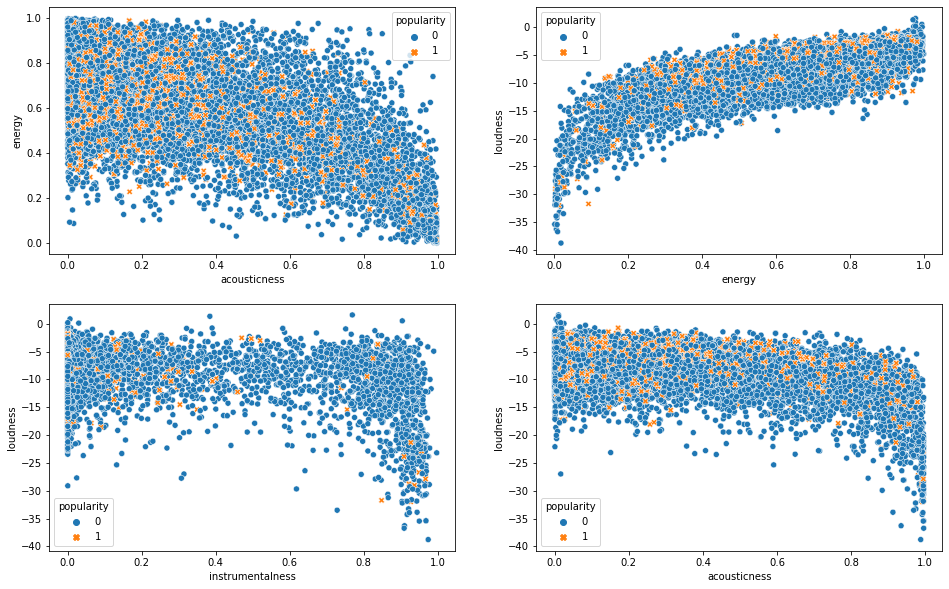

In [24]:
f, axes = plt.subplots(2,2,figsize=(16,10))

sns.scatterplot(data=song_data, x="energy", y="loudness", hue= 'popularity', style="popularity", ax=axes[0, 1])
sns.scatterplot(data=song_data, x="acousticness", y="loudness", hue= 'popularity',style="popularity")
sns.scatterplot(data=song_data, x="instrumentalness", y="loudness", hue= 'popularity',style="popularity", ax=axes[1,0])
sns.scatterplot(data=song_data, x="acousticness", y="energy", hue= 'popularity',style="popularity", ax=axes[0,0])
#plt.legend(loc= 'best')

Hemos plasmado las correlaciones mas significativas de nuestro "heatmap" en graficos de dispersion y tambien agregamos la variable a predecir en formato de color para observar si hay algun tipo de relacion entre las correlaciones de las variables y la clasificacion de la popularidad de la cancion. A pesar de encontrar visualmente las correlaciones de las variables predictoras, no observamos ninguna relacion clara que incida en la clasificacion de la variable a predecir.

Para profundizar la precision en las distribuciones de nuestras variables y en sus respectivas correlaciones, vamos a intentar detectar los "Outliers" que hayan en nuestro Dataset en los distintos features y removerlos. 

In [25]:
#esta funcion es para detectar los outliers y la encontre en Kaggle: 'https://www.kaggle.com/kadirkaya28/titanic-eda-basic-ml'

from collections import Counter

def detectar_outliers(df,features):
    outlier_indices = []
    
    for feat in features:
        # Conseguimos el Primer Cuartil
        
        Q1 = np.percentile(df[feat],25)
        # Tercer Cuartil
        
        Q3 = np.percentile(df[feat],75)
        
        # IQR (Calculamos el Rango Intercuartilico)
        
        IQR = Q3 - Q1  
        # Outlier step 
        
        outlier_step = IQR * 1.5
        
        # todo lo que se encuentre 'Q1 -IRQ*1.5' o  'Q3 + IRQ*1.5' lo consideramos Outlier,
        # y los vamos a detectar junto a sus indices
        
        outlier_list_col = df[(df[feat] < Q1 - outlier_step) | (df[feat] > Q3 + outlier_step)].index
        
        # store indeces
        
        outlier_indices.extend(outlier_list_col)
        
        #seleccionar solamente las observaciones que contengan mas de 2 outliers
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

aplicamos la funcion y detectamos los 'outliers'

In [26]:
song_data.loc[detectar_outliers(song_data,['song_popularity', 'song_duration_ms',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'speechiness','audio_valence'])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
232,La Maza,58.0,351400.0,0.6520,0.555,0.331,0.000012,9,0.235,-17.718,0.0,0.2700,170.603,3.0,0.437,0
253,Whole Lotta Love,77.0,333893.0,0.0484,0.412,0.902,0.131000,9,0.405,-11.600,1.0,0.4050,89.740,4.0,0.422,1
501,Do You Feel Like We Do,48.0,836666.0,0.0439,0.295,0.568,0.011700,0,0.977,-8.232,1.0,0.0284,98.284,4.0,0.384,0
981,The Times They Are A-Changin' - Live at Sony M...,49.0,348560.0,0.6300,0.393,0.416,0.007910,9,0.986,-13.243,1.0,0.0401,163.604,3.0,0.512,0
1113,November Rain,38.0,537506.0,0.0165,0.197,0.629,0.279000,11,0.125,-9.291,1.0,0.0300,79.495,4.0,0.221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15247,I Know You So Well,8.0,102661.0,0.9230,0.679,0.311,0.721000,0,0.813,-16.557,0.0,0.1050,60.724,4.0,0.304,0
16642,same stars,46.0,116918.0,0.2510,0.687,0.284,0.862000,0,0.496,-19.504,1.0,0.0378,115.996,4.0,0.159,0
17723,Dutch Spring,0.0,205623.0,0.1960,0.510,0.843,0.135000,6,0.569,-4.958,0.0,0.3910,83.355,4.0,0.832,0
3720,Racism And Injustice,21.0,260160.0,0.9220,0.650,0.316,0.000000,9,0.739,-18.244,0.0,0.9400,117.198,4.0,0.306,0


vamos a dropear estos valores 'outliers' y asignarlos a nuestro dataset de trabajo.

In [27]:
song_data = song_data.drop(detectar_outliers(song_data,['song_popularity', 'song_duration_ms',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'speechiness','audio_valence']), axis=0).reset_index(drop = True)

In [28]:
#Chequeamos nuevamente que no se hayan agregado valores nulos o "NaN" en ninguna de las instancias de nuestras columnas.
song_data.columns[song_data.isnull().any()]
song_data.isnull().values.any()

False

EDA VARIABLES CATEGORICAS (audio_mode, key, time_signature, popularity)


In [29]:
#VARIABLE A PREDECIR VS FEATURES CATEGORICOS
#Popularity VS key(promedio)

song_data[['key','popularity']].groupby('key', as_index= False).mean().sort_values(by= 'popularity', ascending= False)

,key,popularity
1,1,0.307406
6,6,0.271289
11,11,0.254741
0,0,0.247543
5,5,0.243348
8,8,0.243243
10,10,0.240555
4,4,0.229294
2,2,0.209371
9,9,0.205405


In [30]:
#Popularity VS time_signature
song_data[['time_signature','popularity']].groupby('time_signature', as_index= False).mean().sort_values(by= 'popularity', ascending= False)


,time_signature,popularity
3,4.0,0.242476
4,5.0,0.227907
2,3.0,0.182706
1,1.0,0.136364
0,0.0,0.000000


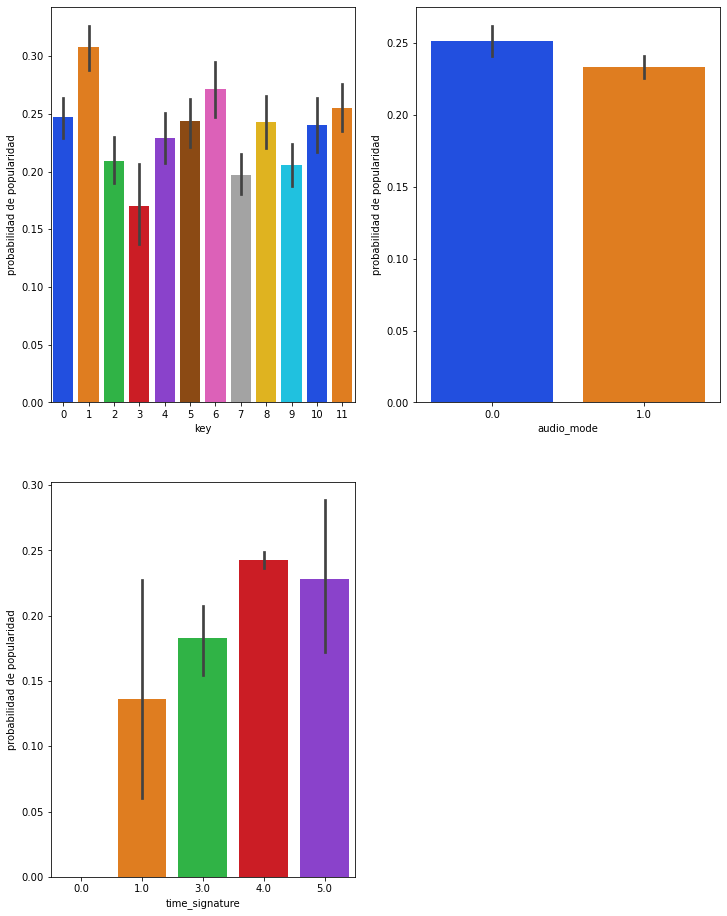

In [31]:
#VARIABLE A PREDECIR VS FEATURES CATEGORICOS
#Graficos De Barras
f, axes = plt.subplots(2, 2, figsize=(12, 16))

ax= sns.barplot(x = "key", y = "popularity", data = song_data, palette='bright', ax=axes[0,0])
ax.set(xlabel='key', ylabel='probabilidad de popularidad')

ax1= sns.barplot(x = "audio_mode", y = "popularity", data = song_data, palette='bright', ax=axes[0,1])
ax1.set(xlabel='audio_mode', ylabel='probabilidad de popularidad')


ax2= sns.barplot(x = "time_signature", y = "popularity", data = song_data, palette='bright', ax=axes[1,0])
ax2.set(xlabel='time_signature', ylabel='probabilidad de popularidad')

f.delaxes(axes[1][1])

En los anteriores graficos de barra, tenemos un analisis en el que la probabilidad de popularidad esta aislada de todas las demas variables que no sean las de su respectivo eje X, presentan los siguientes datos:

- En el grafico de axes[0,0] ('Key-Prob Popularidad), se presenta que las keys 1 (Do#) y 6(Fa#) son las que mayor probabiliad de popularidad tienen.

- En el grafico de axes[0,1] ('Audio Mode-Prob Popularidad), el Audio-mode 0 (es decir, la escala Menor) tiene mayores probabilidades de resultar en una cancion popular.
- En el grafico de axes[1,0] ('time_signature - Prob Popularidad) el time_signature '4' (es decir, el famoso compas cuatro cuartos (4/4) tiempos) tiene mayores probabilidades de resultar en una cancion popular. 

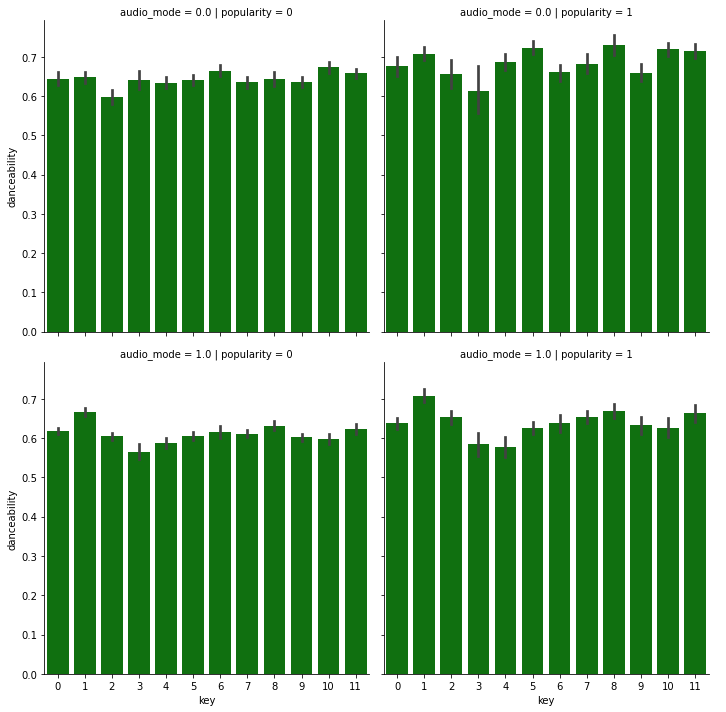

In [32]:
#VARIABLE A PREDECIR VS FEATURES CATEGORICOS (CONTINUACION)

#Key vs danceability comparado por audio_mode y popularity

g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 5)
g.map(sns.barplot, "key", "danceability", color='green')
g.add_legend()
plt.show()

Aqui comparamos los features "Danceability" y "Key" cuando "Popularity" y "audio_mode" son '1' o '0'.

- Del primero par de graficos, observamos que en el audio_mode 0 (escala menor), Danceability tiende a ser un poco mas alto cuando la cancion es Popular. Tambien podemos observar que la distribucion de frecuencia de "Key" cuando 'Popularity = 0' es mas homogenea, pero cuando 'popularity = 1', la distribucion presenta mayores disparidades y algunas keys tienden a ser mas bailables (Sobre todo las keys 8 y 5 ,Sol# y Fa respectivamente)

- Del segundo par de graficos, mediante el audio_mode 1 (escala mayor), observamos caracteristicas muy similares a la comparacion con el primer par de graficos con audio_mode 0, pero aqui el "key" mas baiable cuando la cancion es popular es el 1 (Escala de Do#)

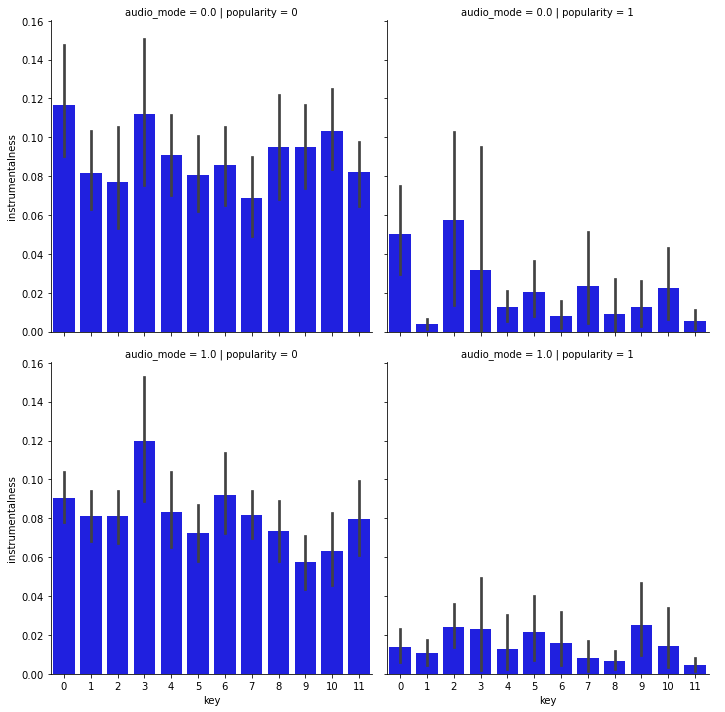

In [33]:
#Key vs Instrumentalness comparado por audio_mode y popularity

g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 5)
g.map(sns.barplot, "key", "instrumentalness",color="blue")
g.add_legend()
plt.show()

En el anterior par de graficos de barra podemos concluir lo siguiente:
- Sin importar que tipo de 'audio_mode' sea, se ve una clara relacion negativa entre 'instrumentalness' y 'popularity'. En ambos graficos, se ve una reduccion muy significativa en la presencia de 'instrumentalness' en las canciones populares, mientras que en las canciones no populares se ve una presencia mucho mayor de 'instrumentalness' sin importar que tipo de 'key' sea.
- Cuando el 'audio_mode' es cero, se ve una presencia de asimetria hacia la izquierda mucho mas marcada hacia 'keys' 0,2 y 3 en en las canciones populares con respecto a las canciones no populares. 

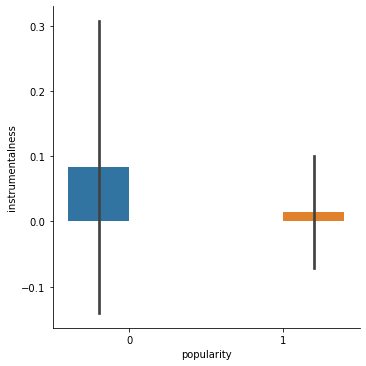

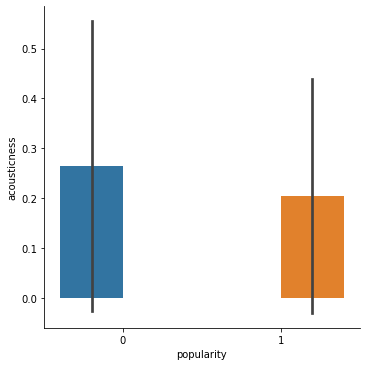

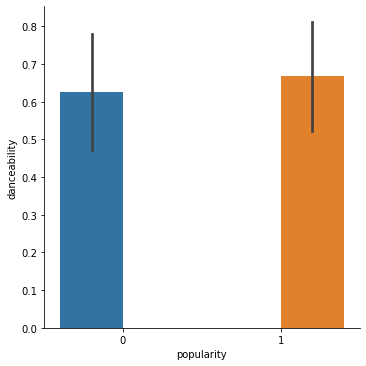

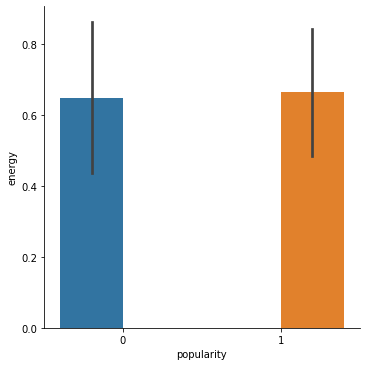

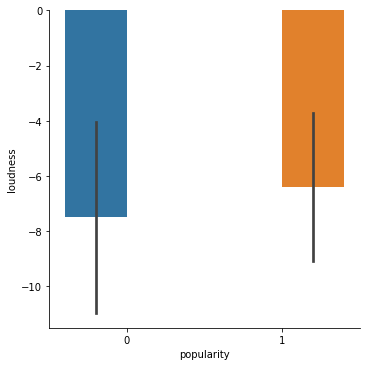

In [34]:
#VARIABLE A PREDECIR VS FEATURES NUMERICOS CONTINUOS

sns.catplot(data=song_data, x="popularity",y='instrumentalness', hue= 'popularity', kind= "bar", ci="sd")
sns.catplot(data=song_data, x="popularity",y='acousticness', hue= 'popularity', kind= "bar", ci="sd")
sns.catplot(data=song_data, x="popularity",y='danceability', hue= 'popularity', kind= "bar", ci="sd")
sns.catplot(data=song_data, x="popularity",y='energy', hue= 'popularity', kind= "bar", ci="sd")
sns.catplot(data=song_data, x="popularity",y='loudness', hue= 'popularity', kind= "bar",ci="sd")


En los anteriores 'catplots' podemos interpretar y corroborar la mayoria de las relaciones que veniamos estudiando.
Las canciones mas populares tienen:

- Menor dispersion de volumen y mayor concentracion de niveles de volumen/loudness mas altos que las canciones no populares.
- Un poco mayor presencia de 'Energy' que las canciones no populares.
- Una marcada mayor presencia de 'Danceability' que las canciones no populares.
- Menor dispersion de acousticness que se traduce en mayor concentracion, pero en niveles de acousticness menores que las canciones no populares.
- Una marcada disminucion de dispersion y de cantidades de instrumentalness que en las canciones no populares.

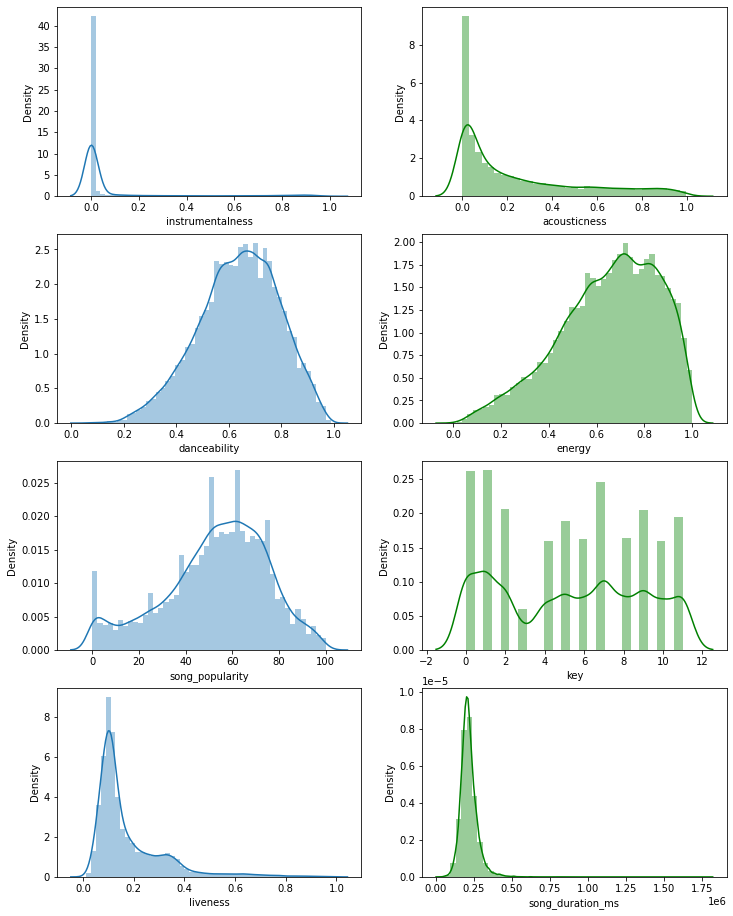

In [35]:
#DISTRIBUCION DE LAS FEATURES

f, axes = plt.subplots(4, 2, figsize=(12, 16))

sns.distplot(song_data["instrumentalness"] ,  ax=axes[0, 0])
sns.distplot(song_data["acousticness"] , color= "g",  ax=axes[0, 1])
sns.distplot(song_data["danceability"] ,  ax=axes[1, 0])
sns.distplot(song_data["energy"] , color= "g", ax=axes[1, 1])
sns.distplot(song_data["song_popularity"] , ax=axes[2, 0])
sns.distplot(song_data["key"] , color= "g", ax=axes[2, 1])
sns.distplot(song_data["liveness"] , ax=axes[3, 0])
sns.distplot(song_data["song_duration_ms"],color= "g", ax=axes[3, 1] )
plt.show()


<AxesSubplot:xlabel='audio_valence', ylabel='Density'>

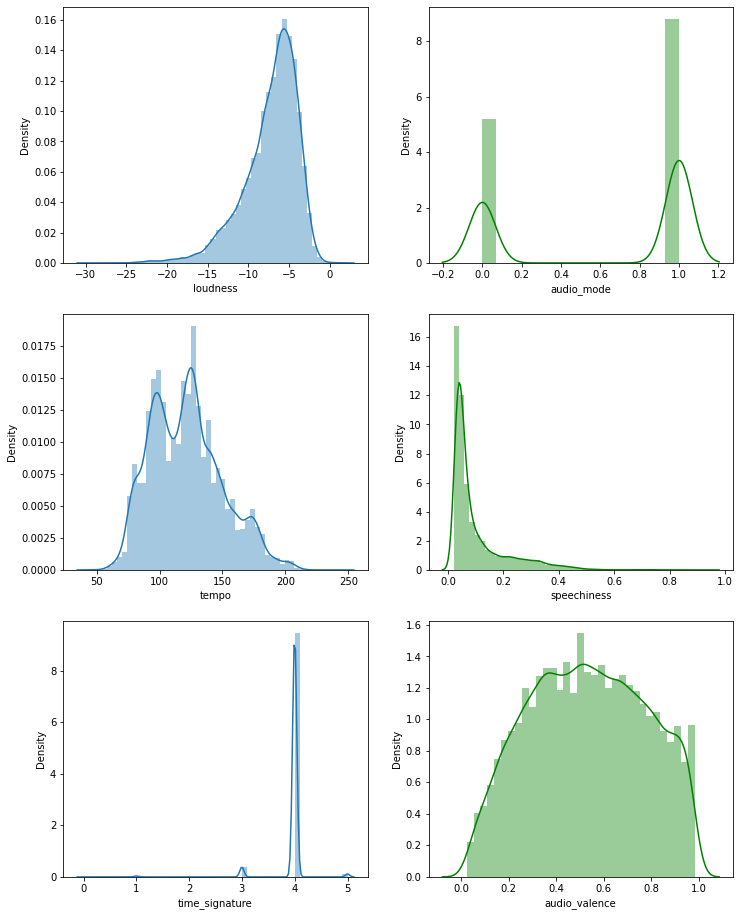

In [36]:
#DISTRIBUCION DE LAS FEATURES (CONTINUACION)

f, axes = plt.subplots(3, 2, figsize=(12, 16))

sns.distplot(song_data["loudness"] , ax=axes[0, 0])
sns.distplot(song_data["audio_mode"] , color="g", ax=axes[0, 1])
sns.distplot(song_data["tempo"] , ax=axes[1, 0])
sns.distplot(song_data["speechiness"] , color="g", ax=axes[1, 1])
sns.distplot(song_data["time_signature"] , ax=axes[2,0])
sns.distplot(song_data["audio_valence"] , color="g", ax=axes[2,1])

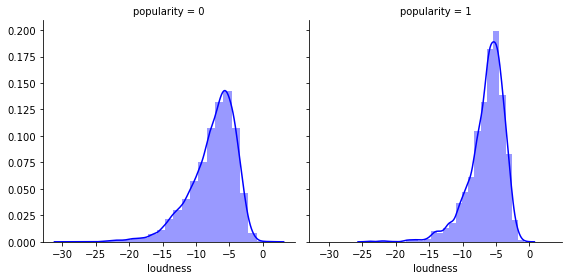

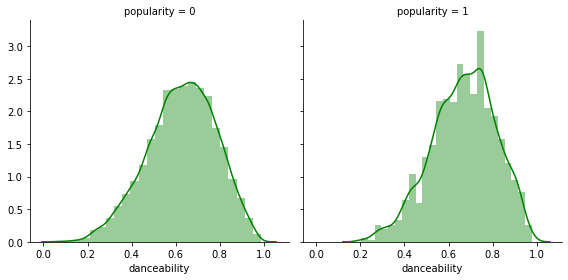

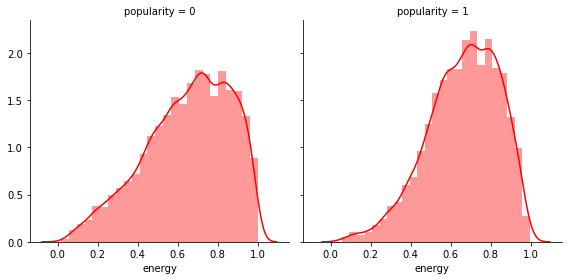

In [37]:
#DISTRIBUCION DE LAS FEATURES (SEPARADOS POR CLASIFICACION DE POPULARITY)

g = sns.FacetGrid(song_data, col = "popularity", size = 4)
g.map(sns.distplot, "loudness",color="blue", bins= 25)

h = sns.FacetGrid(song_data, col = "popularity", size = 4)
h.map(sns.distplot,"danceability",color="green", bins= 25)

i = sns.FacetGrid(song_data, col='popularity', size=4)
i.map(sns.distplot,'energy', bins=25, color='red')


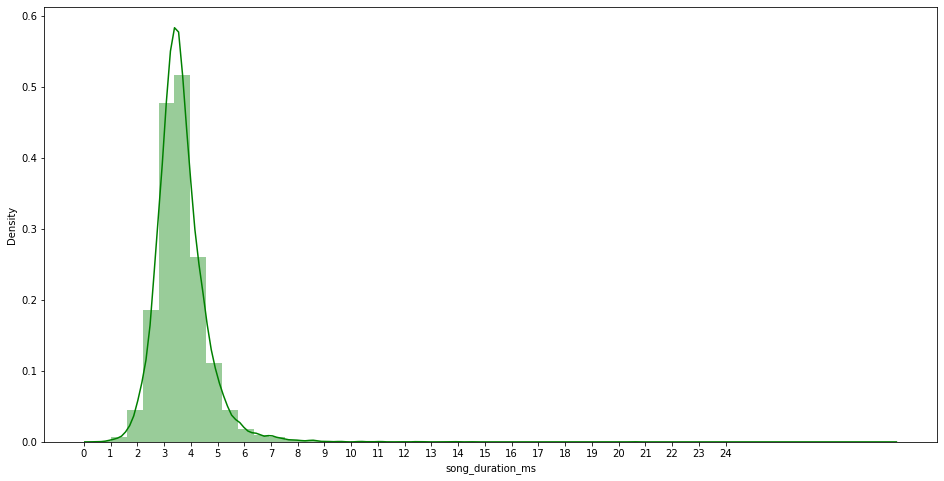

In [38]:
#'song_duration_ms' lo vamos a pasar de milisegundos a minutos para poder interpretarlo mejor.
minutes = []
for t in song_data['song_duration_ms']:
    minutes=(song_data['song_duration_ms'] /60000)
    
#graficamos su distribucion

f, axes = plt.subplots(figsize=(16,8))
graf = sns.distplot(minutes,color= "g", ax= axes)
graf.set_xticks(range(0,25))
plt.show()


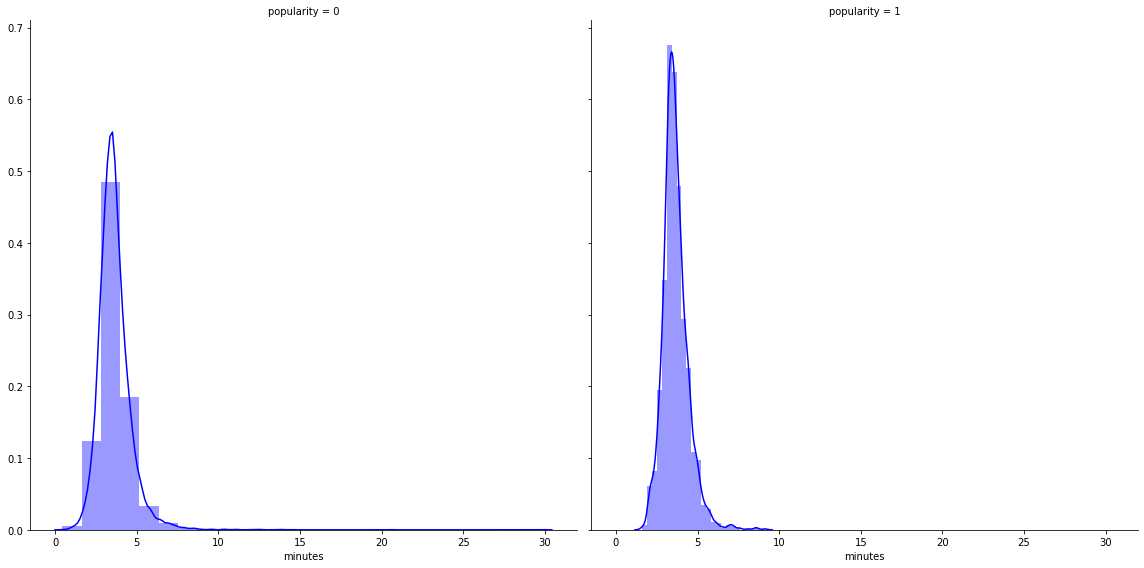

In [39]:
#ahora graficamos su distribucion cuando popularity es 0 y 1 respectivamente e interpretamos:

song_data['minutes'] = (song_data['song_duration_ms'] /60000)

j = sns.FacetGrid(song_data, col='popularity', size=8)
j.map(sns.distplot,'minutes', bins=25, color='blue')
plt.show()

# Observaciones de nuestro EDA:

Podemos obeservar en la distribución y visualización de las variables, que hoy en dia, la popularidad de una cancion muestra:


- Altos valores de las variables 'Loudness','Danceability' y 'Energy', y mayor curtosis en sus respectivas distribuciones de frecuencia. ('Loudness' > -10 y 'Danceability' > 0.6 tienen mayores posibildades de ser una cancion popular)
- Muy poca partcipacion de 'Instrumentalness', y en los casos que haya aunque sea una leve presencia 'instrumentalness' en una cancion popular, tienden a ser valores muy bajos de esta variable y con poca dispersion.
- De acuerdo a 'instrumentalness', 'liveness' y 'speechness' , la mayoria de las canciones no son grabaciones o performances en vivo, sino grabaciones en estudio y suelen tener Letra y cantantes.
- Canciones que duran alreadedor de 3-4 minutos con una baja desviacion estandar de estos valores.
- A la gente le gusta la musica fuerte y rapida (la variable "tempo" nos muestra una media de '121.3' con desviaciones a valores mas altos).
- Valores relativamente bajos de 'Acousticness' y con muy poca varianza.
- Las "keys" que tienen mayores chances de ser parte de una cancion popular son: 0,1,5 y 6 (0 = Do,1 = Re, 5 = Fa, 6=Fa#) 

# Feature Engineering

In [40]:
song_data = song_data.drop(['minutes'], axis=1)

Aqui vamos a:
- Crear variables Dummy para los principales features categoricos.
- Quitar del modelo las variables 'Song_name' (ya que es una variable categorica problematica, que no va a aportarnos informacion relevante en el analisis de la popularidad) y 'song_popularity' (ya que la hemos re-convertido en la variable binaria 'popularity' y al mismo tiempo no estaria aportando informacion relevante a la hora de hacer la clasificacion de la variable predictiva)

CREAMOS LAS VARIABLES DUMMIES

In [41]:
song_data['key'] = song_data['key'].astype('category')

In [42]:
song_data = pd.get_dummies(song_data, columns = ['key'])

In [43]:
song_data["audio_mode"] = song_data["audio_mode"].astype("category")
song_data = pd.get_dummies(song_data, columns=["audio_mode"])

In [44]:
song_data['time_signature'] = song_data['time_signature'].astype('category')
song_data = pd.get_dummies(song_data, columns = ['time_signature'])

In [45]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,key_9,key_10,key_11,audio_mode_0.0,audio_mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,...,0,0,0,0,1,0,0,0,1,0
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,...,0,0,0,1,0,0,0,0,1,0
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,...,0,0,0,0,1,0,0,0,1,0
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,...,0,0,0,0,1,0,0,0,1,0
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,...,0,1,0,0,1,0,0,0,1,0


In [46]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [47]:
print(song_data['key_0'])
print(song_data['key_1'])
print(song_data['key_2'])
print(song_data['key_3'])
print(song_data['key_4'])
#Etc...
#ya sabemos que nuestras dummies "key" son 'integers'

0        0
1        0
2        1
3        1
4        0
        ..
18505    0
18506    0
18507    1
18508    0
18509    0
Name: key_0, Length: 18510, dtype: uint8
0        0
1        0
2        0
3        0
4        0
        ..
18505    0
18506    0
18507    0
18508    0
18509    0
Name: key_1, Length: 18510, dtype: uint8
0        0
1        0
2        0
3        0
4        0
        ..
18505    0
18506    0
18507    0
18508    0
18509    0
Name: key_2, Length: 18510, dtype: uint8
0        0
1        1
2        0
3        0
4        0
        ..
18505    0
18506    0
18507    0
18508    1
18509    0
Name: key_3, Length: 18510, dtype: uint8
0        0
1        0
2        0
3        0
4        0
        ..
18505    0
18506    0
18507    0
18508    0
18509    1
Name: key_4, Length: 18510, dtype: uint8


Vamos a hacer Typecasting en nuestras nuevas variables Dummy 'time_signature' y 'audio_mode' para asegurarnos que sean formato 'INTEGER'

In [48]:
def change_type(variable):
    song_data[variable] = song_data[variable].astype(int)

In [49]:
columnas= ["audio_mode_0.0","audio_mode_1.0","time_signature_0.0","time_signature_1.0","time_signature_3.0","time_signature_4.0","time_signature_5.0"]
for i in columnas:
    change_type(i)

In [50]:
#chequeamos que los 'type' de nuestras columnas sean los correctos:
for i in song_data.columns:
    print(song_data[i])

0        Boulevard of Broken Dreams
1                        In The End
2                 Seven Nation Army
3                        By The Way
4                 How You Remind Me
                    ...            
18505                Let It Breathe
18506                       Answers
18507        Sudden Love (Acoustic)
18508             Gentle on My Mind
18509                      Up to Me
Name: song_name, Length: 18510, dtype: object
0        73.0
1        66.0
2        76.0
3        74.0
4        56.0
         ... 
18505    60.0
18506    60.0
18507    23.0
18508    55.0
18509    60.0
Name: song_popularity, Length: 18510, dtype: float64
0        262333.0
1        216933.0
2        231733.0
3        216933.0
4        223826.0
           ...   
18505    159645.0
18506    205666.0
18507    182211.0
18508    352280.0
18509    193533.0
Name: song_duration_ms, Length: 18510, dtype: float64
0        0.005520
1        0.010300
2        0.008170
3        0.026400
4        0.000954
         

In [51]:
#dropeamos de nuestro dataset las sigueintes variables ya que vamos a analizar hacer modelos de clasificacion
# y el atributo "song_popularity" ya lo hemos convertido de una variable numerica continua a una varabie dummy de clasificacion 'popularity'
# y el "song_name" no nos aporta informacion relevante para nustro analisis

song_data = song_data.drop(['song_popularity', 'song_name'], axis= 1)

# MACHINE LEARNING

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#preparamos los datos: variables predictoras y a predecir para los modelos:

y = song_data['popularity'].values
X = song_data.drop(['popularity'], axis= 1)


Vamos a normalizar las variables numericas continuas de nuestro modelo mediante MinMax Scaling,de esta forma vamos a aumentar la predictividad del modelo.
Aquellas variables que no presenten valores entre 0 y 1 las vamos a normalizar con la siguiente formula:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Gracias a la normalizacion, vamos a tener una mayor predictividad sobre todo en KNN que trabaja con metricas de distancia, de esta forma será una estimación más eficiente y no ponderará más a aquellas distancias lejanas, que no estén entre 0 y 1 por no estar normalizadas.)


In [54]:
#normalizacion de las variables numericas continuas mediante MinMax Scaling

x_norm = (X - np.min(X))/(np.max(X)-np.min(X)).values

x_norm

,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_9,key_10,key_11,audio_mode_0.0,audio_mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,0.133179,0.005541,0.469361,0.677682,0.000030,0.049327,0.818287,0.007662,0.615495,0.469303,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.107575,0.010340,0.519075,0.851551,0.000000,0.099784,0.744321,0.029991,0.299729,0.361082,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.115921,0.008202,0.729817,0.455008,0.451972,0.250848,0.698861,0.062172,0.394887,0.313215,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.107575,0.026505,0.420728,0.970513,0.003589,0.093618,0.791317,0.092601,0.387545,0.182102,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.111462,0.000957,0.416405,0.763091,0.000000,0.104922,0.787254,0.009742,0.640790,0.573361,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,0.075266,0.896586,0.473684,0.137773,0.000066,0.102867,0.434001,0.013573,0.344245,0.288241,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
18506,0.101220,0.768072,0.468281,0.147941,0.000001,0.096701,0.498912,0.008428,0.243681,0.251821,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
18507,0.087993,0.850401,0.710364,0.314692,0.000000,0.117254,0.558289,0.014339,0.428878,0.273673,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
18508,0.183906,0.948795,0.460715,0.315709,0.015875,0.111088,0.564751,0.011384,0.303852,0.312175,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.20, random_state = 42)

print('X_Train :', X_train.shape)
print('y_Train :', y_train.shape)
print('X_Test :', X_test.shape)
print('y_Test :', y_test.shape)

X_Train : (14808, 29)
y_Train : (14808,)
X_Test : (3702, 29)
y_Test : (3702,)


# KNN

In [56]:
# VAMOS A ANALIZAR PRIMERO ATRAVES DEL MODELO KNN
#aleatoriamente seleccionamos 3 numeros de vecinos

from sklearn.neighbors import KNeighborsClassifier
n = 3
clf_knn = KNeighborsClassifier(n_neighbors = n,)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
y_train_pred = clf_knn.predict(X_train)
y_test_pred = clf_knn.predict(X_test)
print('Prediction Train: {}'.format(y_train_pred))
print('Prediction Test: {}'.format(y_test_pred))

Prediction Train: [1 0 0 ... 0 0 0]
Prediction Test: [0 1 0 ... 0 0 0]


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Con KNN (K=3) train accuracy es: ', train_acc)
print('Con KNN (K=3) test accuracy es: ', test_acc)

Con KNN (K=3) train accuracy es:  0.9014046461372232
Con KNN (K=3) test accuracy es:  0.7917341977309562


OPTIMIZACION PARA VECINOS MAS CERCANOS

In [59]:
k_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,25]
train_accuracy = []
test_accuracy = []

for k in k_neighbors:
    clf_knn = KNeighborsClassifier(n_neighbors = k )
    clf_knn.fit(X_train, y_train)
    
    y_train_pred = clf_knn.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = clf_knn.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc) 

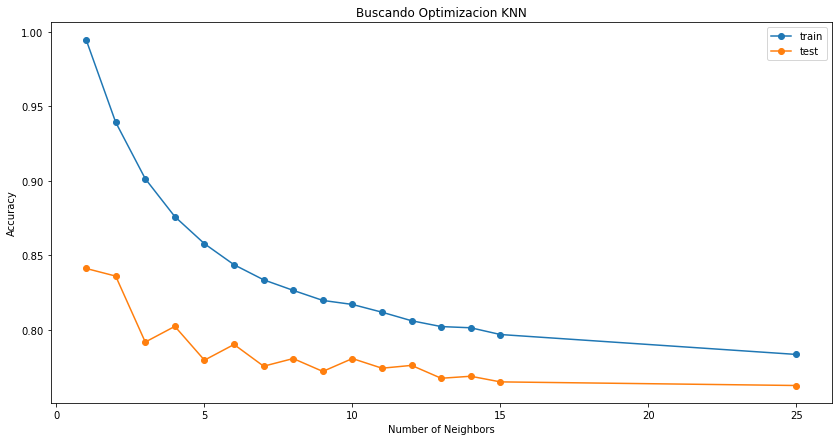

In [60]:
plt.figure(figsize=(14,7))
plt.plot(k_neighbors, train_accuracy, 'o-',label='train')
plt.plot(k_neighbors, test_accuracy, 'o-',label='test')
plt.legend()
plt.title('Buscando Optimizacion KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [61]:
# N= 1 VECINOS PARECE SER LA SOLUCION MAS EFICIENTE, pero en realidad esta generando "Overfitting" en el modelo mayor al 20%
# N = 2
n= 2

clf_knn = KNeighborsClassifier(n_neighbors = n, metric= 'euclidean')
clf_knn.fit(X_train, y_train)
train_acc = accuracy_score(y_train, y_train_pred)
y_train_pred = clf_knn.predict(X_train)
y_test_pred = clf_knn.predict(X_test)

KNN_train_acc = accuracy_score(y_train, y_train_pred)
KNN_test_acc = accuracy_score(y_test, y_test_pred)

print('Con KNN (K=2) train accuracy es: ', KNN_train_acc)
print('Con KNN (K=2) test accuracy es: ', KNN_test_acc)

Con KNN (K=2) train accuracy es:  0.9393571042679633
Con KNN (K=2) test accuracy es:  0.8360345759049163


Podemos observar que el mejor resultado del modelo se dara cuando el numero de vecinos sea igual a 2. De todas formas, hay una diferencia entre el valor de train y test de un 10%, por lo que claramente el algoritmo estaria memorizando el set de entrenamiento y entrando en un proceso de "overfitting" (no tan grande como cuando el numero de vecinos es "1", ahi el overfitting es mayor al 20%).
A medida que el numero de vecinos crece, apesar de que train y test se acercan mas en cuanto a sus resultados de accuracy, el modelo empieza a hacer "underfitting" producto de la cantidad de la gran cantidad creciente de vecinos que esta teniendo en cuenta el algoritmo, la barrera de decision de clasificacion tiende a ser muy baja.  

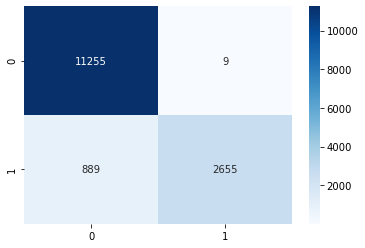

In [62]:
co_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(co_train,annot=True,fmt="d", cmap= "Blues")
plt.show()

In [63]:
#PRECISION train_Set: Podemos observar que nuestro indicador de precision va a ser muy alto producto de la baja 
#cantidad de Falsos positivos en la predicción del train set

precision_train_KNN = 11255 / (11255 + 9)
precision_train_KNN

0.9992009943181818

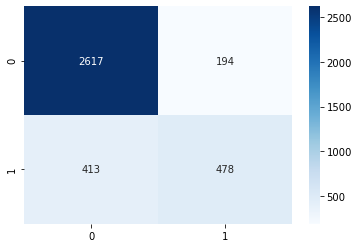

In [64]:
co_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(co_test,annot=True,fmt="d", cmap= "Blues") 
plt.show()

In [65]:
#PRECISION test_Set: Nuestro indicador de precision va a ser alto pero menor que en el train set.
# Si las diferencias son muy grandes con el train set, podríamos estar incurriendo en casos de overfitting 
# (lo vamos a observar en el gráfico de "busqueda de optimizacion del accuracy")

precision_test_KNN = 2617 / (2617 + 194)
precision_test_KNN


#es un poco menor que en el train set, pero de todas formas está bastante bien !

0.9309854144432587

# Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score,f1_score

In [67]:
#comenzaremos con prueba-error, tomando distintos valores de max_depth. Luego de varias pruebas, 
#nos parece apropiado tomar max_depth = 10 de entrada (debido a la gran cantidad de datos en el dataset)

clf_tree = DecisionTreeClassifier(max_depth = 10, random_state=42)
clf_tree.fit(X_train,y_train)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Con max_depth = 10 , train accuracy es: ', train_acc)
print('Con max_depth = 10  test accuracy es: ', test_acc)

Con max_depth = 10 , train accuracy es:  0.8429227444624527
Con max_depth = 10  test accuracy es:  0.7784981091301999


In [68]:
accuracy_train = []
accuracy_test = []

max_depths = np.arange(1,25)

for max_depth in max_depths:
    
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    accuracy_train.append(train_acc)
    accuracy_test.append(test_acc)

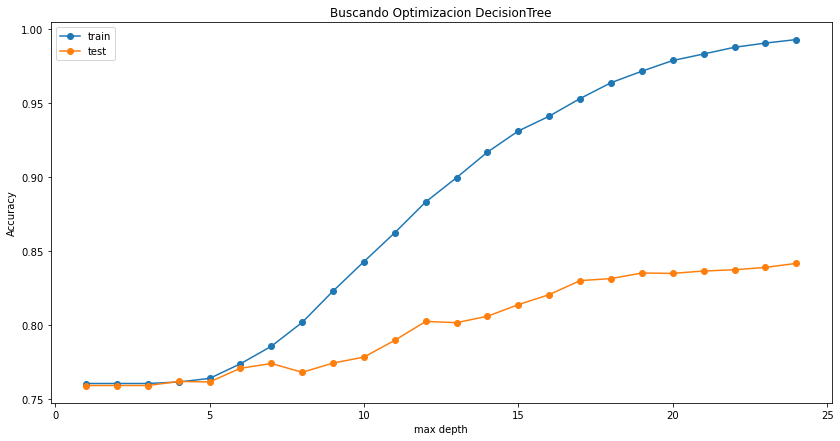

In [69]:
plt.figure(figsize=(14,7))
plt.plot(max_depths, accuracy_train,'o-',label='train' )
plt.plot(max_depths, accuracy_test,'o-',label='test')
plt.legend()
plt.title('Buscando Optimizacion DecisionTree')
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.show()

Con el modelo de Decision Tree podemos observar algo contrario a lo que sucedia con KNN. Cuando la profundidad del arbol es pequena, apesar de que el set de entrenamiento y el set de prueba esten arrojando valores muy similares, el modelo caer bajo "underfitting" ya que es muy baja la especificacion que se le esta requiriendo al algoritmo, entonces clasifica de manera muy "vaga" a las instancias de los datos.

Por el contrario, a medida que crece la profundidad del arbol, el modelo tiende a elevear su accuracy pero cuando el hiperparametro "max_depth" supera la profundidad de 6 ramas, el algoritmo comienza a generar "overfitting", y el overfitting va siendo mayor cada vez que se incrementa la profundidad del arbol. Es asi como una profundidad de 20 nos arroja un accuracy_score de 0.97% en el train set, pero 0.80% en el test set. 

A partir de la imagen, nos parece apropiado que el hiperparametro "max_depth" tome el valor de 6 ya que es el punto de inflexion entre el crecimiento de las disparidades de ambos set's. Luego de el valor "6", la brecha entre ambos conjuntos tiende a ser exponencialente mayor.

In [70]:
#PARECE SER QUE EL VALOR APROPIADO DE LA PROFUNDIDAD DEL ARBOL ES "6"
from sklearn import tree

clf_tree = DecisionTreeClassifier(max_depth = 6, random_state=42)
clf_tree.fit(X_train,y_train)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

dt_train_acc = accuracy_score(y_train, y_train_pred)
dt_test_acc = accuracy_score(y_test, y_test_pred)

print('Con max_depth = 6 , train accuracy es: ', dt_train_acc)
print('Con max_depth = 6  test accuracy es: ', dt_test_acc)


Con max_depth = 6 , train accuracy es:  0.7739735278227985
Con max_depth = 6  test accuracy es:  0.7709346299297677


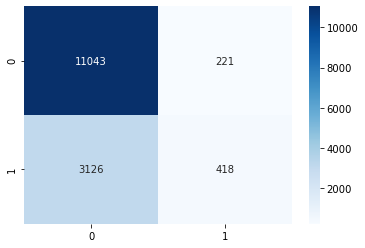

In [71]:
co_train_dt = confusion_matrix(y_train, y_train_pred)
sns.heatmap(co_train_dt,annot=True,fmt="d", cmap= "Blues") 
plt.show()

In [72]:
precision_train_DT = 11043 / (11043 + 221)
precision_train_DT

0.9803799715909091

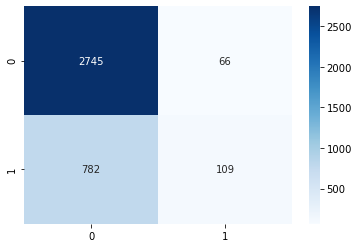

In [73]:
co_test_dt = confusion_matrix(y_test, y_test_pred)
sns.heatmap(co_test_dt,annot=True,fmt="d", cmap= "Blues") 
plt.show()

In [74]:
precision_test_DT = 2745 / (2745 + 66)
precision_test_DT

0.9765208110992529

Ambos train y test sets presentan valores de Precision muy similares, y siguen la trayectoria que muestran los valores relativos de train y test accuracy.

## Modelos Comparados

In [75]:
model_performances=pd.DataFrame({'Modelo':['DecisionTreeClassifier','K-NearestNeighbors'],
                                 'Test_Accuracy':[round(dt_test_acc,2), round(KNN_test_acc,2)], 'Train_Accuracy':[round(dt_train_acc,2), round(KNN_train_acc,2)]})

model_performances.sort_values(by = "Test_Accuracy",ascending=False)

,Modelo,Test_Accuracy,Train_Accuracy
1,K-NearestNeighbors,0.84,0.94
0,DecisionTreeClassifier,0.77,0.77


Nuestro modelo Benchmark en este caso será el Modelo de Decision Tree (DT). Tomamos este modelo como modelo base para poder ir mejorando las métricas de Accuracy, precision, Recall, etc ya sea cambiando Hiperparámetros de los modelos o mediante modificaciones en el feature engineering de nuestro Dataset que nos permitan también mejorar las métricas y al mismo tiempo alejarnos del overfitting/underfitting de los modelos.

Podemos observar a partir de nuestros resultados de Accuracy y de nuestras respectivas 'confusion_matrix's' que el modelo de KNN arroja mejores métricas. Es por eso que en principio deberíamos profundizar en aplicar los cambios de Hiperparámetros en KNN o la incorporación de nuevas columnas en el Dataset orientados a mejorar las predicciones que nos arroja KNN.

KNN es nuestro mejor modelo por el momento. A pesar de estar haciendo un porcentaje de 10% de Overfitting, (mientras que DT en su punto óptimo no presenta overfitting pero tiene métricas mucho más bajas) comparando con el grafico de busqueda de optimizacion de hiperparametros de ambos modelos KNN y Decision Tree, (k_neighbors y max_depth respectivamente) podemos concluir que KNN predice mejor que DecisionTree en este dataset así como está procesado hasta el momento.

En DT, Mejores métricas de test_Accuracy comienzan a aparecer luego de alrededor de 'max_depth = 20', lo cual nos devuelve un train_accuracy de casi 100%. Una enorme brecha entre las métricas de train y test, y un inminente y claro overfitting del modelo que muestra un bajo sesgo pero una enorme varianza. Sumado a todo esto, cuando 'max_depth >= 20' el test_accuracy sigue siendo más bajo que en KNN con los hiperparámetros que ya teníamos previamente (K_neighbors = 2)


Parece tener cierto sentido que KNN sea mejor modelo ya que tenemos aproximadamente un 40% de las variables del Dataset que son variables numéricas continuas y el algoritmo de KNN basado en cálculos de distancia relativa a las instancias del Dataset trabaja muy bien con variables numericas. Esto lo pudimos corroborar cuando normalizamos las variables a través de MinMax Scaling y no solo la brecha de overfitting de KNN se achicó un 2%, sino que también aumentó alrededor de otro 2% la predictividad del modelo tanto en train_accuracy como test_Accuracy. Por otro lado, en DT luego de la normalización, el modelo continuó arrojando los mismos resultados.  

# CRITICA DE LA METODOLOGIA IMPLEMENTADA

Tenemos 19000 datos disponibles y hemos intentado predecir que canciones seran populares a partir de caracteristicas del audio de cada cancion.
No hemos visto ninguna correlacion lineal muy marcada en nuestros datos, es por eso que los metodos de prediccion lineales no funcionan bien aqui.

Al tener datos extraidos desde la API de Spotify, las features ya estaban muy bien organizadas, todas columnas con instancias completas y la mayoria con atributos de valores entre 0 y 1.
Los resultados de nuestros modelos fueron relativamente buenos, de todas formas el analisis se puede profundizar mucho más.
Quizá investigando la API de Spotify, e indagando cómo es que los científicos de datos de Spotify calculan las features, nos podría dar un gran insight de cómo podríamos proceder combinando columnas del Dataset para que nuestras correlaciones (que como dijimos, desde un principio no muestran linealidad muy marcada entre las variables) mejoren y así las predicciones del modelo.
Por ejemplo, atributos como "Danceability", "Acousticness" o "Energy" arrojan valores que parecen muy abstractos en cuanto a su medición y las correlaciones entre si no son muy elevadas (cuando uno pensaría a simple vista que todas deben tener fuertes correlaciones simplemente por conocimientos previos de música).
Entonces creemos que con creatividad e investigación se puede  combinar y manipular las columnas del dataset creando nuevos atributos que generen mayor poder predictivo a ambos modelos.
